In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\ML\Train.csv")
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
# Fill missing values in the "education" column with the mode
data['education'].fillna(data['education'].mode()[0], inplace=True)

In [4]:
# Check for duplicate rows
print("Number of duplicate rows:", data.duplicated().sum())
# Drop duplicates
data.drop_duplicates(inplace=True)

Number of duplicate rows: 0


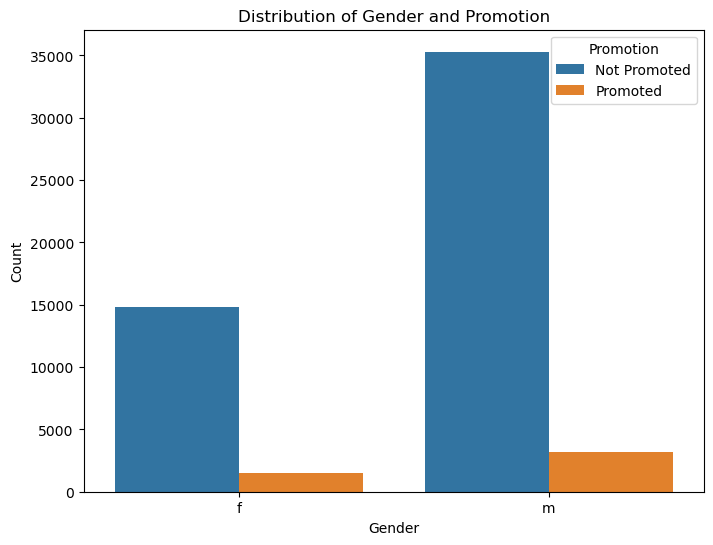

In [5]:
#Use Charts (Count plots) to examine and compare the features present in the dataset
# Create a count plot for gender and promotion status
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='gender', hue='is_promoted')
plt.title('Distribution of Gender and Promotion')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Promotion', labels=['Not Promoted', 'Promoted'])
plt.show()

In [6]:
# Drop unnecessary columns
data = data.drop(['employee_id', 'region'], axis=1)


In [7]:
#Checking null values
data.isnull().sum()

department                 0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
#Replaced the null values
data.dropna(axis=0,inplace=True)
data.isnull().sum()

department              0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [9]:
data.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [10]:

def scale_dataset(data, scaler_type):
    """
    Scale the dataset using the specified scaler.

    Args:
        data (DataFrame): The dataset to be scaled.
        scaler_type (str): Type of scaler to be used ('minmax', 'standard', 'robust', 'maxabs').

    Returns:
        DataFrame: The scaled dataset.
    """

In [11]:
data = data.copy()  # Create a copy to avoid modifying the original data

In [12]:
label_encoders = {}
categorical_columns = ['department', 'education', 'gender', 'recruitment_channel']
for column in categorical_columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [13]:
data.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,2,0,2,1,35,5.0,8,1,0,49,0
1,4,0,1,0,1,30,5.0,4,0,0,60,0
2,7,0,1,2,1,34,3.0,7,0,0,50,0
3,7,0,1,0,2,39,1.0,10,0,0,50,0
4,8,0,1,0,1,45,3.0,2,0,0,73,0


In [14]:
X = data.drop('is_promoted', axis=1)
y = data['is_promoted']

In [15]:
scaler_type="minmax"

In [16]:
if scaler_type =='minmax':
    scaler=MinMaxScaler()
elif scaler_type == 'standard':
    scaler = StandardScaler()
elif scaler_type == 'robust':
 scaler = RobustScaler()
elif scaler_type == 'maxabs':
    scaler = MaxAbsScaler()
else:
    raise ValueError("Invalid scaler_type. Choose from 'minmax', 'standard', 'robust', 'maxabs'.")
    
      

In [17]:
# Scale the features
X_scaled = scaler.fit_transform(X)
    

In [18]:
# Return the scaled dataset
def create_scaled_dataset(X_scaled, X_columns, y):
    scaled_dataset = pd.DataFrame(X_scaled, columns=X_columns)
    scaled_dataset['is_promoted'] = y
    return scaled_dataset


In [19]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#pip install xgboost

In [21]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [23]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb

In [24]:
# XGBoost
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")


XGBoost Accuracy: 0.94


In [25]:
# CatBoost
cat_classifier = CatBoostClassifier(random_state=42, verbose=0)
cat_classifier.fit(X_train, y_train)
y_pred_cat = cat_classifier.predict(X_test)
accuracy_cat = accuracy_score(y_test, y_pred_cat)
print(f"CatBoost Accuracy: {accuracy_cat:.2f}")

CatBoost Accuracy: 0.94


In [26]:
# LightGBM
lgb_classifier = lgb.LGBMClassifier(random_state=42)
lgb_classifier.fit(X_train, y_train)
y_pred_lgb = lgb_classifier.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Accuracy: {accuracy_lgb:.2f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3429, number of negative: 37118
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 40547, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.084569 -> initscore=-2.381833
[LightGBM] [Info] Start training from score -2.381833
LightGBM Accuracy: 0.94


In [27]:
# Define a list of ML models
models = [
    ("XGBoost", XGBClassifier(random_state=42)),
    ("CatBoost", CatBoostClassifier(random_state=42, verbose=0)),
    ("LightGBM", lgb.LGBMClassifier(random_state=42))
]

In [28]:
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()


In [29]:
# Create a dictionary of scaling functions
scaling_functions = {
    'standard': standard_scaler,
    'minmax': min_max_scaler
}

In [30]:
# Define scaling functions
scaling_functions = [
    ("StandardScaler", StandardScaler()),
    ("MinMaxScaler", MinMaxScaler())
]

In [31]:
 # Iterate over scaling functions and models
for scaler_name, scaler in scaling_functions:
    # Scale the dataset
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for model_name, model in models:
        print(f"Scaling: {scaler_name}, Model: {model_name}")
        

Scaling: StandardScaler, Model: XGBoost
Scaling: StandardScaler, Model: CatBoost
Scaling: StandardScaler, Model: LightGBM
Scaling: MinMaxScaler, Model: XGBoost
Scaling: MinMaxScaler, Model: CatBoost
Scaling: MinMaxScaler, Model: LightGBM


In [37]:
# Train the model
model.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 3429, number of negative: 37118
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 40547, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.084569 -> initscore=-2.381833
[LightGBM] [Info] Start training from score -2.381833


LGBMClassifier(random_state=42)

In [39]:
# Make predictions
y_pred_scaled = model.predict(X_test_scaled)

In [43]:
# Calculate confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred_scaled)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[9212   25]
 [ 587  313]]


In [42]:
accuracy = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy: {accuracy:.2f}")
        
print("=" * 30)

Accuracy: 0.94
